# Pandas Basics 

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Define a date range
dates = pd.date_range('2019-12-31', '2020-5-31')
print(dates[0])
df=pd.DataFrame(index=dates)
print(df.head())

2019-12-31 00:00:00
Empty DataFrame
Columns: []
Index: [2019-12-31 00:00:00, 2020-01-01 00:00:00, 2020-01-02 00:00:00, 2020-01-03 00:00:00, 2020-01-04 00:00:00]


### pd.read: read csv



In [4]:
nyse=pd.read_csv("Data/^NYA.csv")
print(nyse.head(1))

         Date         Open          High           Low         Close  \
0  2019-08-07  12627.55957  12663.330078  12414.110352  12632.959961   

      Adj Close      Volume  
0  12632.959961  4491750000  


In [5]:
print("We can combine df.join() and df.dropna() using the how=inner argument of df.join()")

We can combine df.join() and df.dropna() using the how=inner argument of df.join()


## build a dataframe from joining two csv



In [6]:

# 1. build an empty dataframe
#date_range function 
#define the date range
start_date = '2020-02-01'
end_date = '2020-03-01'
dates = pd.date_range(start_date, end_date) #start and end
print(dates)

#datetime index object: (a list of)
print(dates[0])

#index as dates
df1=pd.DataFrame(index=dates)
print(df1)
#combine the empty dataframe and dfSPY
#join function 
#a.join(b)
#a is base, all index in a will be in the new df
#index in b, which is also presented in a will be in the new df
#remaining row: nans
dfSPY = pd.read_csv("Data/SPY.csv")
print(" ")
print("#########################")
print(dfSPY)
print("dfspy has index of 0 to ...")
print("need to fomulate the read_csv: the date as the index")
print("parse_date: make the time indexing object present")
print("usecols: trim the column needed")
print("na_values: csv has NaN as STRING")
print("tell the csv that NaN should not interpreted as numbers")
print("#########################")
print(" ")


dfSPY=pd.read_csv("Data/SPY.csv",index_col="Date",parse_dates=True,usecols=['Date', 'Adj Close'], na_values=['nan'])
df1=df1.join(dfSPY)
df1 = df1.dropna()
print(df1)

DatetimeIndex(['2020-02-01', '2020-02-02', '2020-02-03', '2020-02-04',
               '2020-02-05', '2020-02-06', '2020-02-07', '2020-02-08',
               '2020-02-09', '2020-02-10', '2020-02-11', '2020-02-12',
               '2020-02-13', '2020-02-14', '2020-02-15', '2020-02-16',
               '2020-02-17', '2020-02-18', '2020-02-19', '2020-02-20',
               '2020-02-21', '2020-02-22', '2020-02-23', '2020-02-24',
               '2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28',
               '2020-02-29', '2020-03-01'],
              dtype='datetime64[ns]', freq='D')
2020-02-01 00:00:00
Empty DataFrame
Columns: []
Index: [2020-02-01 00:00:00, 2020-02-02 00:00:00, 2020-02-03 00:00:00, 2020-02-04 00:00:00, 2020-02-05 00:00:00, 2020-02-06 00:00:00, 2020-02-07 00:00:00, 2020-02-08 00:00:00, 2020-02-09 00:00:00, 2020-02-10 00:00:00, 2020-02-11 00:00:00, 2020-02-12 00:00:00, 2020-02-13 00:00:00, 2020-02-14 00:00:00, 2020-02-15 00:00:00, 2020-02-16 00:00:00, 2020-02-17 00:00:00

#### We can combine df.join() and df.dropna() using the how=inner argument of df.join()

## Read multiple stocks in a combined dataframe

In [7]:
symbols = ['AAPL', 'MFT', 'TSLA']
df = pd.DataFrame(index=dates)
for symbol in symbols:
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df_temp = pd.read_csv("Data/{}.csv".format(symbol), index_col = "Date", 
                          parse_dates = True, usecols = ['Date', 'Adj Close'], na_values = ['nan'])
    df_temp.rename(columns={'Adj Close': symbol}, inplace=True)
    """column name must be unique"""
    df = df.join(df_temp)
    df = df.dropna()
print(df)

                  AAPL        MFT        TSLA
2020-02-03  306.545197  13.637316  780.000000
2020-02-04  316.665344  13.656839  887.059998
2020-02-05  319.247589  13.715412  734.700012
2020-02-06  322.981781  13.764220  748.960022
2020-02-07  318.591583  13.744698  748.070007
2020-02-10  320.104767  13.891124  771.280029
2020-02-11  318.173462  13.959457  774.380005
2020-02-12  325.729401  13.998506  767.289978
2020-02-13  323.409851  14.057282  804.000000
2020-02-14  323.489502  14.165038  800.030029
2020-02-18  317.566223  14.008301  858.400024
2020-02-19  322.165466  14.194425  917.419983
2020-02-20  318.860352  14.174834  899.409973
2020-02-21  311.642975  14.214018  901.000000
2020-02-24  296.839783  14.253201  833.789978
2020-02-25  286.785187  14.233609  799.909973
2020-02-26  291.334656  14.076873  778.799988
2020-02-27  272.290649  14.096466  679.000000
2020-02-28  272.131348  13.322580  667.989990


In [8]:
def symbol_to_path(symbol, base_dir = "Data"):
    """Return CSV path with given ticker symbol"""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))
def get_data(symbols, dates):
    df = pd.DataFrame(index=dates)
    """Read stock data (adjusted close) for given symbols from CSV files."""
    if 'SPY' not in symbols:
        """add SPY for reference"""
        symbols.insert(0, 'SPY') 
        
    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col = "Date", 
                          parse_dates = True, usecols = ['Date', 'Adj Close'], na_values = ['nan'])
        df_temp.rename(columns={'Adj Close': symbol}, inplace=True)
        """column name must be unique"""
        df = df.join(df_temp)
        df = df.dropna()
    
    return df

def test_run():
    # Define a date range
    sd,ed = '2020-01-30', '2020-07-30'
    dates = pd.date_range('2020-01-30', '2020-07-30')

    # Choose stock symbols to read
    symbols = ['AAPL', 'MFT', 'TSLA']
    
    # Get stock data
    df = get_data(symbols, dates)
    print(df.head(10))

if __name__ == "__main__":
    test_run()

                   SPY        AAPL        MFT        TSLA
2020-01-30  324.337128  321.650970  13.598270  640.809998
2020-01-31  318.447845  307.389374  13.627554  650.570007
2020-02-03  320.813446  306.545197  13.637316  780.000000
2020-02-04  325.703064  316.665344  13.656839  887.059998
2020-02-05  329.464294  319.247589  13.715412  734.700012
2020-02-06  330.572876  322.981781  13.764220  748.960022
2020-02-07  328.811035  318.591583  13.744698  748.070007
2020-02-10  331.265717  320.104767  13.891124  771.280029
2020-02-11  331.839813  318.173462  13.959457  774.380005
2020-02-12  333.977783  325.729401  13.998506  767.289978


## Slicing

In [9]:
dates = pd.date_range('2020-01-01', '2020-01-31')

symbols = ['AAPL', 'MFT', 'TSLA']  # SPY will be added in get_data()

df = get_data(symbols, dates)

sd,ed = '2020-01-01','2020-01-31'


### Row Slicing

In [10]:
print(df.loc[sd:ed].head()) #more pythonic?
print()
print(df[sd:ed].head())

                   SPY        AAPL        MFT        TSLA
2020-01-02  321.555786  298.292145  13.218055  430.260010
2020-01-03  319.120911  295.392120  13.159697  443.010010
2020-01-06  320.338379  297.745880  13.227781  451.540009
2020-01-07  319.437653  296.345581  13.325044  469.059998
2020-01-08  321.140106  301.112640  13.354221  492.140015

                   SPY        AAPL        MFT        TSLA
2020-01-02  321.555786  298.292145  13.218055  430.260010
2020-01-03  319.120911  295.392120  13.159697  443.010010
2020-01-06  320.338379  297.745880  13.227781  451.540009
2020-01-07  319.437653  296.345581  13.325044  469.059998
2020-01-08  321.140106  301.112640  13.354221  492.140015


In [12]:
"""ROW + Column Slicing"""
print(df.loc[sd:ed][['TSLA', 'MFT']].head())
# print(df.loc[sd:ed][['TSLA','MFT']].head()) #more pythonic?
# print()
# print(df[sd:ed][['TSLA','MFT']].head())

                  TSLA        MFT
2020-01-02  430.260010  13.218055
2020-01-03  443.010010  13.159697
2020-01-06  451.540009  13.227781
2020-01-07  469.059998  13.325044
2020-01-08  492.140015  13.354221


## Ploting

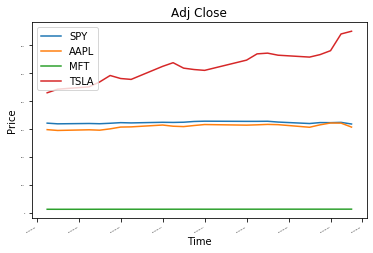

In [35]:
"""Normalize the data so they all start at 1.0"""
"""df = df / df.ix[0] (Lower level)
df = df / df.ix[0, :]"""
ax = df.plot(title="Adj Close",fontsize=2)
ax.set_xlabel('Time')
ax.set_ylabel('Price')
plt.show()

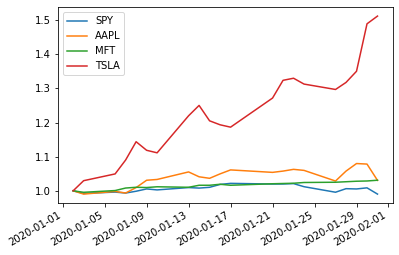

In [14]:
#equal footing with normalization 
df3 = df / df.iloc[0, :] 
df3.plot()
plt.show()

                   SPY        AAPL        MFT        TSLA
2020-01-30  324.337128  321.650970  13.598270  640.809998
2020-01-31  318.447845  307.389374  13.627554  650.570007
2020-02-03  320.813446  306.545197  13.637316  780.000000
2020-02-04  325.703064  316.665344  13.656839  887.059998
2020-02-05  329.464294  319.247589  13.715412  734.700012
2020-02-06  330.572876  322.981781  13.764220  748.960022
2020-02-07  328.811035  318.591583  13.744698  748.070007
2020-02-10  331.265717  320.104767  13.891124  771.280029
2020-02-11  331.839813  318.173462  13.959457  774.380005
2020-02-12  333.977783  325.729401  13.998506  767.289978


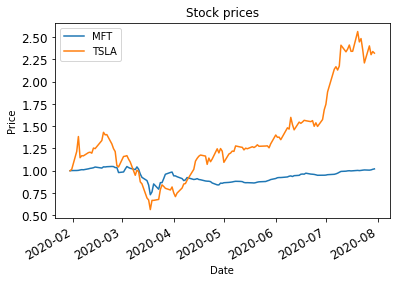

In [15]:
def symbol_to_path(symbol, base_dir = "Data"):
    """Return CSV path with given ticker symbol"""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))
def get_data(symbols, dates):
    df = pd.DataFrame(index=dates)
    """Read stock data (adjusted close) for given symbols from CSV files."""
    if 'SPY' not in symbols:
        """add SPY for reference"""
        symbols.insert(0, 'SPY') 
        
    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col = "Date", 
                          parse_dates = True, usecols = ['Date', 'Adj Close'], na_values = ['nan'])
        df_temp.rename(columns={'Adj Close': symbol}, inplace=True)
        """column name must be unique"""
        df = df.join(df_temp)
        df = df.dropna()
    
    return df

def plot_data(df, title="Stock prices"):
    """Plot stock prices with a custom title and meaningful axis labels."""
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show()
    
    
def test_run():
    # Define a date range
    sd,ed = '2020-01-30', '2020-07-30'
    dates = pd.date_range('2020-01-30', '2020-07-30')

    # Choose stock symbols to read
    symbols = ['AAPL', 'MFT', 'TSLA']
    
    # Get stock data
    df = get_data(symbols, dates)
    print(df.head(10))
    
    # Slice and plot
    plot_selected(df, ['MFT', 'TSLA'], sd,ed)
    
def plot_selected(df, columns, start_index, end_index):
    """Plot the desired columns over index values in the given range."""
    df = normalize_data(df)
    plot_data(df.loc[start_index:end_index, columns])

def normalize_data(df):
    """Normalize stock prices using the first row of the dataframe."""
    return df / df.iloc[0, :]

if __name__ == "__main__":
    test_run()